## Atividade N1 - Inteligência Artificial 2025.1

## Nome:

## RA:

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

O setor de qualidade de uma empresa fabricante de componentes eletrônicos contratou um engenheiro de computação para implantar um sistema automático de estimativa de valores de resistores. O processo de testes é baseado na Lei de Ohm, utilizando-se a equação $$V = RI,$$ em que $V$ é a tensão em (V) **aplicada** ao resistor, $I$ em (A) é a corrente elétrica **medida** e $R$ em (Ω) é o valor do resistor estimado pelo sistema que será desenvolvido pelo engenheiro de computação. A Figura 1 ilustra o processo de testes.

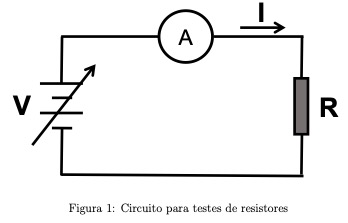

A Tabela 1 mostra as medições obtidas nos testes do resistor.

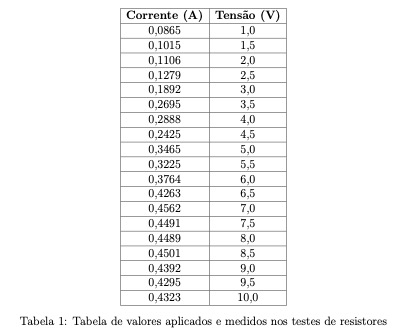

### Base de Dados:

In [4]:
#corrente
I = [0.0865,0.1015,0.1106,0.1279,0.1892,0.2695,0.2888,0.2425,0.3465,0.3225,0.3764,0.4263,0.4562,0.4491,0.4489,
     0.4501,0.4392,0.4295,0.4323]

#tensao
V = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0] 

In [5]:
len(I), len(V)

(19, 19)

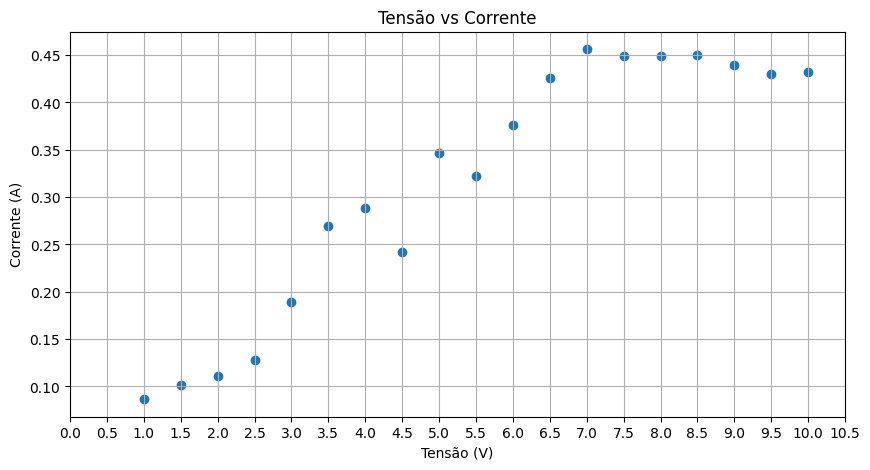

In [7]:
# Plotar distribuição dos dados
plt.figure(figsize=(10, 5))
plt.scatter(V, I)
plt.xlabel('Tensão (V)')
# Display all value in x axis
plt.xticks(np.arange(0, 11, 0.5))
plt.ylabel('Corrente (A)')
plt.title('Tensão vs Corrente')
plt.grid()
plt.show()

Diante das informações fornecidas pela empresa, o engenheiro de computação deve desenvolver uma solução utilizando, obrigatoriamente, **regressão linear aplicada com machine learning**, que, a partir das informações obtidas na Tabela 1, estime o valor do resistor $R$ em (Ω). 

A solução desenvolvida deve conter:

**(5,0 pontos) o algoritmo de machine learning, que implementa e informa o valor de $R$;**

_**V = R * I**_
 
_**fx = w * x + b**_

R = w

I = x

V = y

b = 0, não temos um coeficiente linear somando na fórmula original

Custo em 999 iterações =  0.04070716960476831
w = 0.04547909962083821 b = 0.06496117583426521


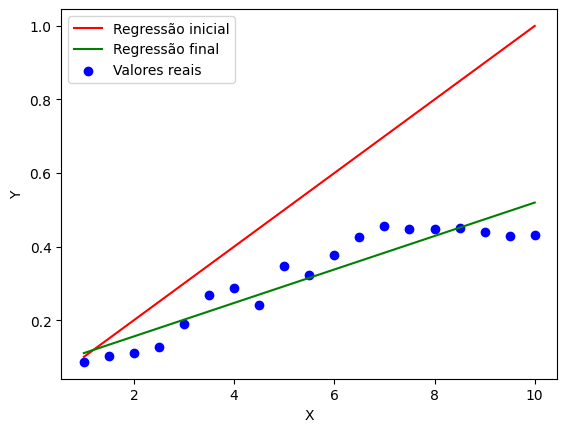

In [ ]:
def linear_regression(X, Y, w=0.1, b=0.7, alpha=0.01, iteracoes=1000):
    costs = []

    fig, ax = plt.subplots()
    ax.plot(X, np.multiply(w, X) + b, 'r-', label='Regressão inicial')
    ax.legend()
    plt.ylabel('Y')
    plt.xlabel('X')

    # Loop de iteracoes para o gradiente convergir para o valor minimo
    for i in range(iteracoes):
        # Função Custo
        Y_pred = np.multiply(w, X) + b  # y_chapeu
        Loss_error = (Y_pred - Y)**2  # Erro de cada linha da base
        cost = np.sum(Loss_error)  # funcao Custo

        # Gradiente
        db = np.sum((Y_pred - Y))
        dw = np.dot((Y_pred - Y), X)
        costs.append(cost)
        w = w - alpha*dw
        b = b - alpha*db

        if i == (iteracoes-1):
            print("Custo em", i, "iterações = ", cost)
            print("w =", w, "b =", b)
            ax.plot(X, np.multiply(w, X) + b, 'g-', label='Regressão final')
            ax.scatter(X, Y, color='blue', label='Valores reais')
            ax.legend(loc='best')
            plt.show()

    return w, b, costs

# Chama a função com a base de dados
w, b, costs = linear_regression(V, I, w=0.1, b=0, alpha=0.001, iteracoes=1000)

Custo em 29 iterações =  0.057522010372952244
w = 0.05494227953990938


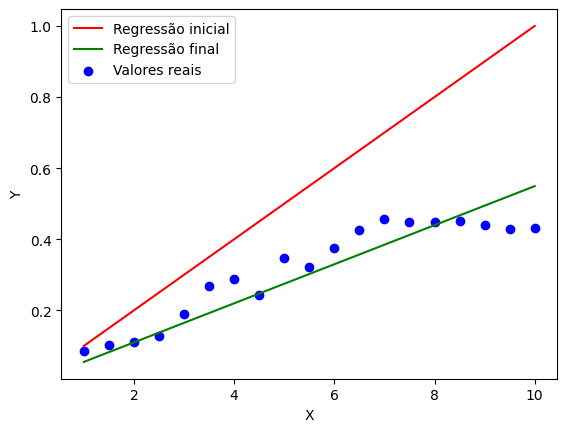

In [42]:
def linear_regression_sem_b(X, Y, w=0.1, alpha=0.01, iteracoes=1000):
    costs = []

    fig, ax = plt.subplots()
    ax.plot(X, np.multiply(w, X), 'r-', label='Regressão inicial')
    ax.legend()
    plt.ylabel('Y')
    plt.xlabel('X')

    # Loop de iteracoes para o gradiente convergir para o valor minimo
    for i in range(iteracoes):
        # Função Custo
        Y_pred = np.multiply(w, X) # y_chapeu
        Loss_error = (Y_pred - Y)**2  # Erro de cada linha da base
        cost = np.sum(Loss_error)  # funcao Custo

        # Gradiente
        dw = np.dot((Y_pred - Y), X)
        costs.append(cost)
        w = w - alpha*dw

        if i == (iteracoes-1):
            print("Custo em", i, "iterações = ", cost)
            print("w =", w)
            ax.plot(X, np.multiply(w, X), 'g-', label='Regressão final')
            ax.scatter(X, Y, color='blue', label='Valores reais')
            ax.legend(loc='best')
            plt.show()

    return w, costs

# Chama a função com a base de dados
w, costs = linear_regression_sem_b(V, I, w=0.1, alpha=0.001, iteracoes=30)

In [43]:
print(f"O valor de R é {w:.3f} ohms")

O valor de R é 0.055 ohms


**(1,0 ponto) o valor do parâmetro de tolerância do resistor $R$, justificando sua resposta.**

Sendo a regressão linear a solução de machine learning mais indicada para estimar o valor de $R$,

**(1,0 ponto) o coeficiente da regressão linear chamado de intercept deve ser considerado na execução do algoritmo? Justifique sua resposta;**

In [ ]:
# A fórmula que descreve a tensão aplicada ao resistor não possui um coeficiente linear (b) e é dada por V = R * I.
# Portanto, o valor do resistor R é o coeficiente angular da regressão linear e por isso não deve ser considerado na execução do modelo.

**(1,0 ponto) qual é a precisão aproximada para utilizar-se o menor número de iterações na execução da aplicação, tendo como base o custo ou erro obtido em cada iteração? Justifique sua resposta.**

In [ ]:
# Qual é a menor quantidade de iterações necessárias para que o modelo atinja o custo minimo?
# R: Com base na análise do seguinte gráfico, com duas iterações o modelo atinge o valor de custo próximo ao custo minimo.

w =  0.05494227953990938 & b =  0


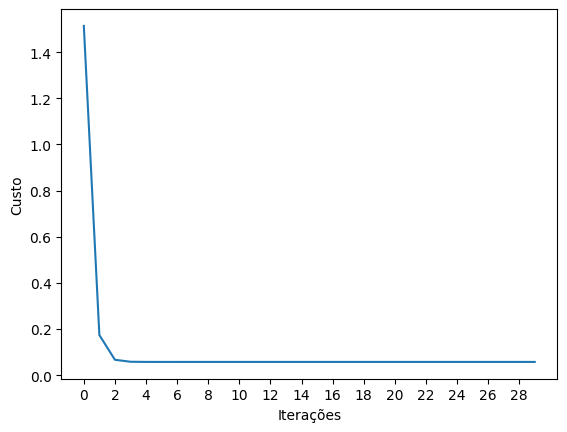

In [44]:
print("w = ", w,"& b = ", 0)
plt.plot(costs)
plt.xticks(np.arange(0, 30, 2))
plt.ylabel('Custo')
plt.xlabel('Iterações')
plt.show()

Analisando o problema e a solução desenvolvida, considerando os aspectos da engenharia e da física envolvidos, descreva e justifique

**(2,0 pontos) uma recomendação de melhoria no processo da empresa.**

In [ ]:
# A partir do gráfico de tensão vs corrente, podemos ver que os dados a partir de aproximadamente V = 7 não seguem uma relação linear, o que é esperado para um resistor ôhmico. A resistência não permanece constante.
# Uma recomendação seria testar um modelo mais complexo para essa distribuição como um modelo polinomial para capturar a não linearidade dos dados
